In [14]:
import numpy as np
import matplotlib.pyplot as plt

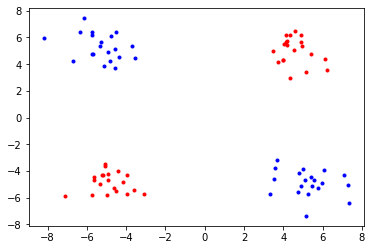

In [15]:
NumberSamples = 20

PointX = []
PointY = []
PointZ = []

# AND gate
# X=0 , Y=0, Z=0

PointX = np.append( PointX , -5 * np.ones(NumberSamples) )
PointY = np.append( PointY , -5 * np.ones(NumberSamples) )
PointZ = np.append( PointZ , np.zeros(NumberSamples) )

# X=0 , Y=1 , Z=0

PointX = np.append( PointX , -5 * np.ones(NumberSamples) )
PointY = np.append( PointY ,  5 * np.ones(NumberSamples) )
PointZ = np.append( PointZ , np.ones(NumberSamples) )

# X=1 , Y=0 , Z=0

PointX = np.append( PointX ,  5 * np.ones(NumberSamples) )
PointY = np.append( PointY , -5 * np.ones(NumberSamples) )
PointZ = np.append( PointZ , np.ones(NumberSamples) )

# X=1 , Y=1 , Z=1

PointX = np.append( PointX ,  5 * np.ones(NumberSamples) )
PointY = np.append( PointY ,  5 * np.ones(NumberSamples) )
PointZ = np.append( PointZ ,  np.zeros(NumberSamples) )

# Adding noise to input data

PointX = PointX + 1 * np.random.randn( 4* NumberSamples )
PointY = PointY + 1 * np.random.randn( 4* NumberSamples )

# Plot data

for i in range(4 * NumberSamples):
    if (PointZ[i]==0) :
        plt.plot( PointX[i] , PointY[i] , '.r' )
    if (PointZ[i]==1) :
        plt.plot( PointX[i] , PointY[i] , '.b' )

plt.show()

PointClass = 2 * PointZ - 1

Error =  40.0 Estimated Slope =  -0.02379465302072041 Estimated Intercept 0.0
Error =  32.0 Estimated Slope =  -0.03623269454797427 Estimated Intercept 0.0
Error =  36.0 Estimated Slope =  -0.0667805642687299 Estimated Intercept -0.004
Error =  36.0 Estimated Slope =  -0.09322561497408152 Estimated Intercept -0.008
Error =  36.0 Estimated Slope =  -0.09693796043586203 Estimated Intercept -0.004
Error =  36.0 Estimated Slope =  0.0018914531532768786 Estimated Intercept 0.016
Error =  40.0 Estimated Slope =  0.012969842029179285 Estimated Intercept 0.024
Error =  28.0 Estimated Slope =  -0.012227223441390869 Estimated Intercept 0.02
Error =  44.0 Estimated Slope =  -0.061289521359355496 Estimated Intercept 0.016
Error =  40.0 Estimated Slope =  -0.10209998306993504 Estimated Intercept 0.008
Error =  48.0 Estimated Slope =  -0.24175523758450126 Estimated Intercept -0.016
Error =  40.0 Estimated Slope =  -0.21820968767469195 Estimated Intercept -0.008
Error =  40.0 Estimated Slope =  -0.19

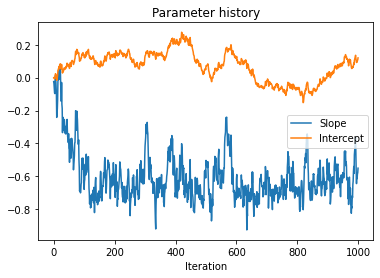

In [16]:
SlopeEstimate = 0
InterceptEstimate = 0

NumberIterations = 1000
LearningRate = 0.001
BatchSize = 20

SlopeHistory = []
InterceptHistory = []

for It in range( NumberIterations ):
    Index = np.random.permutation( len(PointX) )

    BatchPointX = PointX[ Index[1:BatchSize] ]
    BatchPointY = PointY[ Index[1:BatchSize] ]

    BatchPointClass = PointClass[ Index[1:BatchSize] ]
    
    LineFunctionEstimate = BatchPointY - ( SlopeEstimate * BatchPointX + InterceptEstimate )
    PointClassEstimate = np.sign( LineFunctionEstimate )

    Error = np.sum( ( BatchPointClass - PointClassEstimate )**2 )
    dError_dSlope = np.sum( 2 * ( BatchPointClass - PointClassEstimate ) * BatchPointX )
    dError_dIntercept = np.sum( 2 * ( BatchPointClass - PointClassEstimate ) )

    SlopeEstimate = SlopeEstimate - LearningRate * dError_dSlope
    InterceptEstimate = InterceptEstimate - LearningRate * dError_dIntercept

    SlopeHistory = np.append( SlopeHistory , SlopeEstimate )
    InterceptHistory = np.append( InterceptHistory , InterceptEstimate )

    print("Error = ",Error, "Estimated Slope = ",SlopeEstimate, "Estimated Intercept",InterceptEstimate) 

plt.plot( SlopeHistory )
plt.plot( InterceptHistory )
plt.title( 'Parameter history' )
plt.xlabel( 'Iteration' )
plt.legend( ['Slope' , 'Intercept'] )
plt.show()

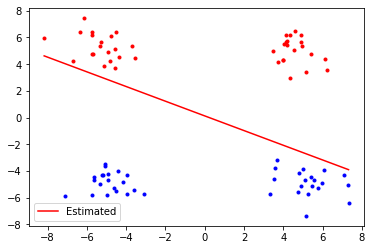

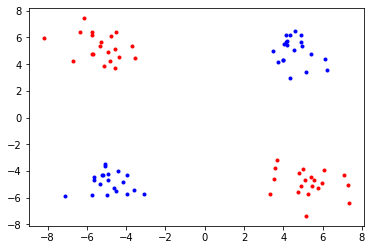

In [18]:
Xmin = np.min( PointX )
Xmax = np.max( PointX )

Ymin = np.min( PointY )
Ymax = np.max( PointY )

NumberPoints = 4 * NumberSamples

LineFunctionEstimate = PointY - ( SlopeEstimate * PointX + InterceptEstimate )
PointClassEstimate = np.sign( LineFunctionEstimate )

YminEstimate = SlopeEstimate * Xmin + InterceptEstimate
YmaxEstimate = SlopeEstimate * Xmax + InterceptEstimate

plt.plot( [Xmin,Xmax] , [YminEstimate,YmaxEstimate] , 'r' )
plt.legend( ["Estimated"])

for i in range( NumberPoints ):
    if PointClassEstimate[i]==1 :
        plt.plot( PointX[i] , PointY[i] , '.r' )
    else :
        plt.plot( PointX[i] , PointY[i] , '.b' )

plt.show()

# Original plot

for i in range(4 * NumberSamples):
    if (PointZ[i]==0) :
        plt.plot( PointX[i] , PointY[i] , '.b' )
    if (PointZ[i]==1) :
        plt.plot( PointX[i] , PointY[i] , '.r' )

plt.show()